# 17기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [59]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   KMeans_labels           200 non-null    int32
 5   DBSCAN_opt_labels       200 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 10.2 KB


# k-means

In [6]:
import numpy as np


from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df)

KMeans(n_clusters=4, random_state=42)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(df))

In [7]:
k_means.labels_

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

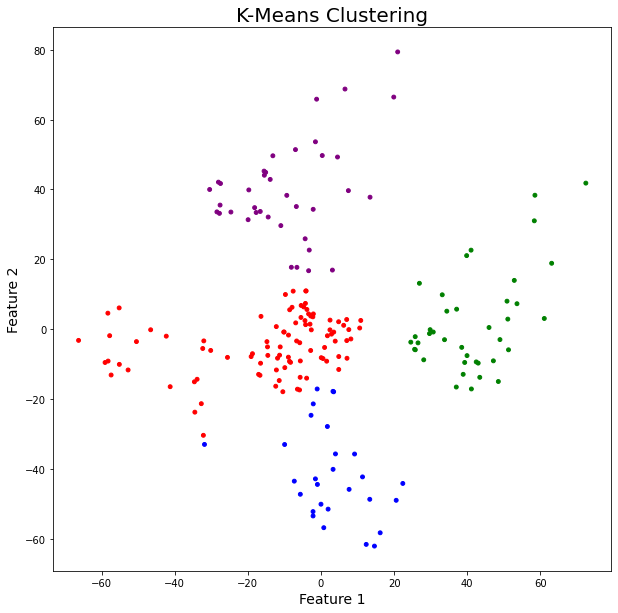

In [17]:
import matplotlib.pyplot as plt
import matplotlib
colors=['purple','red','blue','green']
df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(data[0],data[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

PCA를 활용하여 2차원 평면에 잘 구분이 되었는지 표현해보았다.  
다음엔 하이퍼파라미터인 n_clusters를 변경하여 (5,6) 그림을 다시 출력해보았다

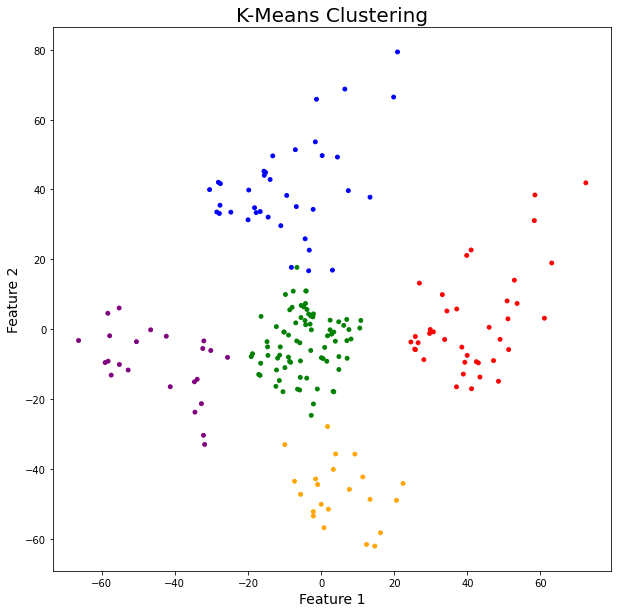

In [20]:
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(df)

pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(df))

colors=['purple','red','blue','green','orange']
df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(data[0],data[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

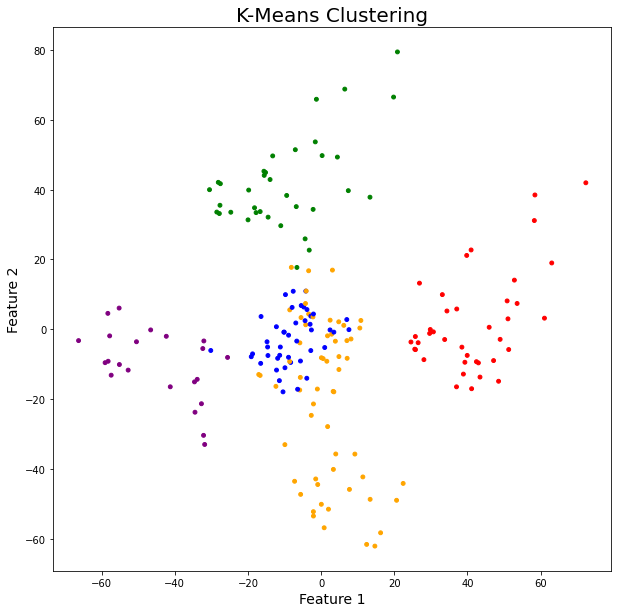

In [21]:
k_means=KMeans(n_clusters=6,random_state=42)
k_means.fit(df)

pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(df))

colors=['purple','red','blue','green','orange']
df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(data[0],data[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

6은 잘 구분이 되지않는 것으로 보아 5가 제일 최적으로 판단된다

# DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(df)


DBSCAN()

In [23]:
dbscan.labels_  #기본값은 구별이 아예 안되는 것을 확인할수 있다.

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [54]:
dbscan=DBSCAN(eps=5,min_samples=5) # eps = 0.5 / min_samples = 5
dbscan.fit(df)
dbscan.labels_ 

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  2, -1,  1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1,  2,  2,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [55]:
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(df))


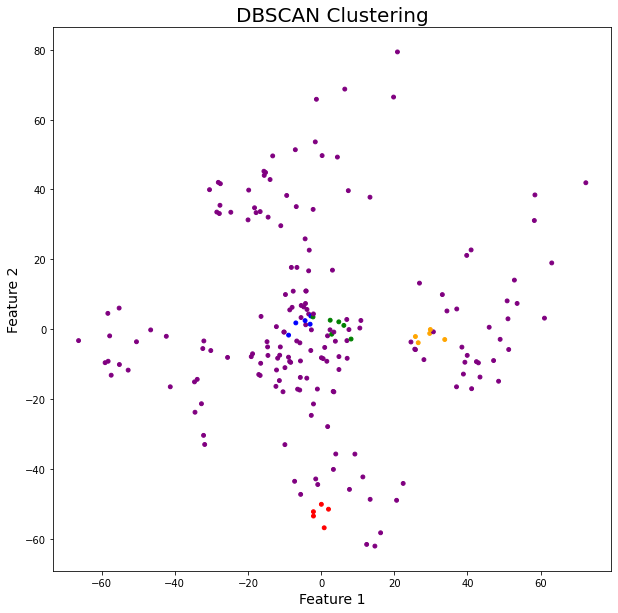

In [56]:
df['DBSCAN_opt_labels']=dbscan.labels_
colors=['purple','red','blue','green','orange']

plt.figure(figsize=(10,10))
plt.scatter(data[0],data[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

k-means보다는 잘 구별을 못시키는 것을 확인할수있따.